In [1]:
import pandas as pd
import requests
import os

df = pd.read_csv('cs552j_A1_dataset_image_id_url.csv')

In [14]:
# Folder where you want to save the image
save_folder = "a1_images"
os.makedirs(save_folder, exist_ok=True)

In [ ]:
def download_image(image_url, save_folder):
    image_name = os.path.join(save_folder, image_url.split("/")[-1])
    response = requests.get(image_url)
    if response.status_code == 200:
        with open(image_name, "wb") as file:
            file.write(response.content)
        print(f"Image saved at: {image_name}")
    else:
        print("Failed to download image")

In [ ]:
# # downloads all the images to your computer. Do this only once locally, then you can continue.

for i in df.coco_url.values:
    download_image(i, save_folder)

# Your Assessment code below

- please make good use of markdown to separate the sections. 

In [ ]:

# image_folder = "images"

# for index, row in df.iterrows():
#     old_name = row["file_name"]  # Original filename
#     label = str(row["label"]).replace(" ", "_") 

#     old_path = os.path.join(image_folder, old_name)
#     name, ext = os.path.splitext(old_name)
   
#     new_name = f"{name}_{label}{ext}"
#     new_path = os.path.join(image_folder, new_name)

#     if os.path.exists(old_path):
#         os.rename(old_path, new_path)
#         print(f"Renamed: {old_name} → {new_name}")
#     else:
#         print(f"Skipping {old_name}: File not found.")

# print("Image renaming completed!")


Renamed: 000000252219.jpg → 000000252219_walking_running.jpg
Renamed: 000000386912.jpg → 000000386912_sitting.jpg
Renamed: 000000308394.jpg → 000000308394_sitting.jpg
Renamed: 000000456496.jpg → 000000456496_sitting.jpg
Renamed: 000000185250.jpg → 000000185250_standing.jpg
Renamed: 000000356427.jpg → 000000356427_standing.jpg
Renamed: 000000266409.jpg → 000000266409_walking_running.jpg
Renamed: 000000515579.jpg → 000000515579_walking_running.jpg
Renamed: 000000551215.jpg → 000000551215_walking_running.jpg
Renamed: 000000057597.jpg → 000000057597_walking_running.jpg
Renamed: 000000399462.jpg → 000000399462_walking_running.jpg
Renamed: 000000494869.jpg → 000000494869_standing.jpg
Renamed: 000000329219.jpg → 000000329219_standing.jpg
Renamed: 000000214720.jpg → 000000214720_sitting.jpg
Renamed: 000000459153.jpg → 000000459153_sitting.jpg
Renamed: 000000295713.jpg → 000000295713_sitting.jpg
Renamed: 000000273132.jpg → 000000273132_sitting.jpg
Renamed: 000000476415.jpg → 000000476415_standi

# Preprocessing steps follwed

- removed images with incorrect labels (we can add then after correcting)
- checked all the images with their labels
- bounding box annotation
- resize the images
- grayscale
- augmentation

# EDA analysis

- plot the height, width and resolution of the images and print the min max and avg values
- check missing labels in datasets
- check class balance
- 

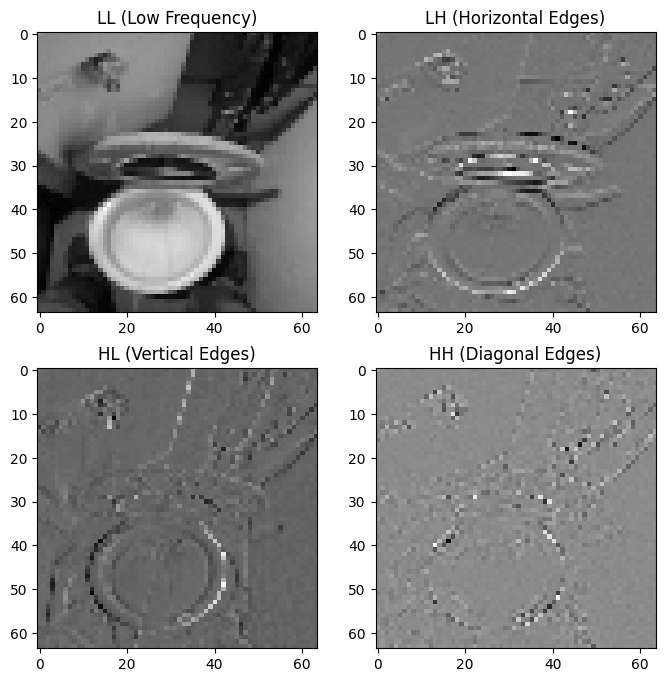

In [4]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread("images/000000005503_standing.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (128, 128))

# Apply Discrete Wavelet Transform (DWT)
coeffs2 = pywt.dwt2(image, 'haar')  # Using Haar wavelets
LL, (LH, HL, HH) = coeffs2

# Plot wavelet components
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1), plt.imshow(LL, cmap='gray'), plt.title("LL (Low Frequency)")
plt.subplot(2, 2, 2), plt.imshow(LH, cmap='gray'), plt.title("LH (Horizontal Edges)")
plt.subplot(2, 2, 3), plt.imshow(HL, cmap='gray'), plt.title("HL (Vertical Edges)")
plt.subplot(2, 2, 4), plt.imshow(HH, cmap='gray'), plt.title("HH (Diagonal Edges)")
plt.show()

# Use LL + other components as features
features = np.concatenate([LL.flatten(), LH.flatten(), HL.flatten(), HH.flatten()])


In [6]:
from PIL import Image
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

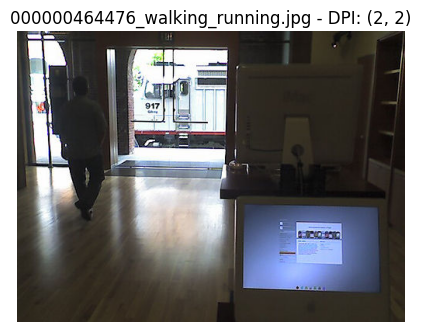

Min Size: (300, 240) (width x height in pixels)
Max Size: (640, 640) (width x height in pixels)
Average Size: (563.6080586080586, 501.27106227106225) (width x height in pixels)
Format Counts: {'JPEG': 273}
Min DPI: (2, 2)
Max DPI: (4800, 4800)
Average DPI: (132.00732600732601, 132.00732600732601)


In [7]:
dataset_path = "images"

image_files = [f for f in os.listdir(dataset_path)]

widths = []
heights = []
formats = []
resolutions = []

for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)
        formats.append(img.format)

        dpi = img.info.get("dpi", (72, 72))
        resolutions.append(dpi)
        if dpi[0] < 50 or dpi[1] < 50:
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{img_file} - DPI: {dpi}")
            plt.show()

min_size = (min(widths), min(heights))
max_size = (max(widths), max(heights))
avg_size = (np.mean(widths), np.mean(heights))
format_counts = Counter(formats)

if resolutions:
    dpi_x, dpi_y = zip(*resolutions)
    min_dpi = (min(dpi_x), min(dpi_y))
    max_dpi = (max(dpi_x), max(dpi_y))
    avg_dpi = (np.mean(dpi_x), np.mean(dpi_y))
else:
    min_dpi = max_dpi = avg_dpi = "No DPI data found"

print(f"Min Size: {min_size} (width x height in pixels)")
print(f"Max Size: {max_size} (width x height in pixels)")
print(f"Average Size: {avg_size} (width x height in pixels)")
print(f"Format Counts: {dict(format_counts)}")
print(f"Min DPI: {min_dpi}")
print(f"Max DPI: {max_dpi}")
print(f"Average DPI: {avg_dpi}")


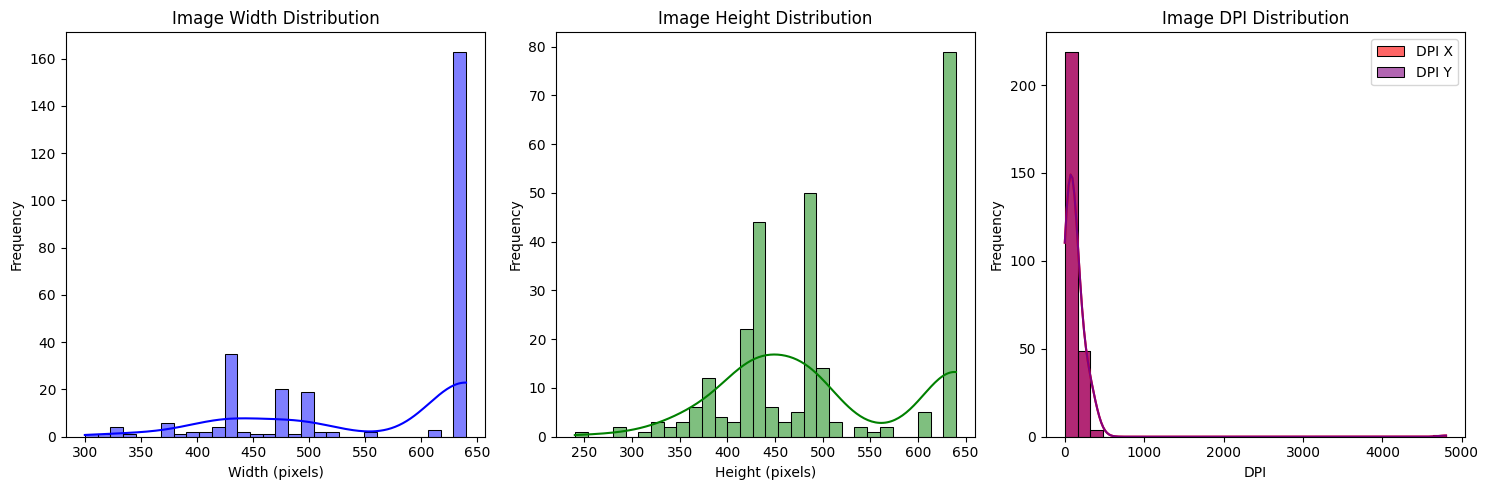

In [8]:
widths, heights = np.array(widths), np.array(heights)
dpi_x, dpi_y = zip(*resolutions)

min_size = (np.min(widths), np.min(heights))
max_size = (np.max(widths), np.max(heights))
avg_size = (np.mean(widths), np.mean(heights))
format_counts = Counter(formats)

min_dpi = (np.min(dpi_x), np.min(dpi_y))
max_dpi = (np.max(dpi_x), np.max(dpi_y)) 
avg_dpi = (np.mean(dpi_x), np.mean(dpi_y)) 

# Plot distributions
plt.figure(figsize=(15, 5))

# Width distribution
plt.subplot(1, 3, 1)
sns.histplot(widths, bins=30, kde=True, color="blue")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.title("Image Width Distribution")

# Height distribution
plt.subplot(1, 3, 2)
sns.histplot(heights, bins=30, kde=True, color="green")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.title("Image Height Distribution")

# DPI distribution
plt.subplot(1, 3, 3)
sns.histplot(dpi_x, bins=30, kde=True, color="red", label="DPI X", alpha=0.6)
sns.histplot(dpi_y, bins=30, kde=True, color="purple", label="DPI Y", alpha=0.6)
plt.xlabel("DPI")
plt.ylabel("Frequency")
plt.title("Image DPI Distribution")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10144\2081736955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


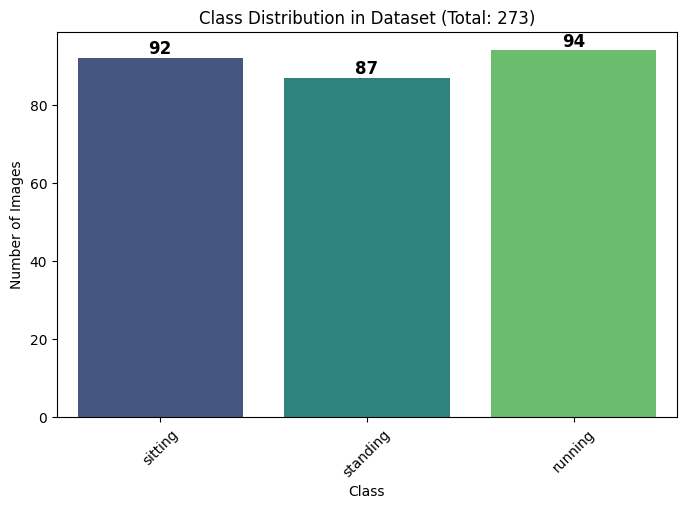

In [12]:
#check class balance and distribution

image_folder = "images"

labels = []
for filename in os.listdir(image_folder):
    label = filename.split("_")[-1].split(".")[0]
    labels.append(label)

label_counts = Counter(labels)
total_images = sum(label_counts.values())

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Display total count
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title(f"Class Distribution in Dataset (Total: {total_images})")
plt.xticks(rotation=45)
plt.show()



In [20]:
train_path = os.path.join('Datasets', "Training_Data")
test_path = os.path.join('Datasets', "Testing_Data")
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [14]:
#train test split
from sklearn.model_selection import train_test_split
import shutil

In [5]:
print(df["label"].value_counts())

label
walking_running    98
sitting            95
standing           92
Name: count, dtype: int64


In [12]:
df.head(3)

,Unnamed: 0,license,file_name,coco_url,height,width,date_captured,flickr_url,id,label
0,2,4,000000252219.jpg,http://images.cocodataset.org/val2017/00000025...,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_...,252219,walking_running
1,11,1,000000386912.jpg,http://images.cocodataset.org/val2017/00000038...,480,640,2013-11-15 16:38:19,http://farm5.staticflickr.com/4088/4980393979_...,386912,sitting
2,27,3,000000308394.jpg,http://images.cocodataset.org/val2017/00000030...,428,640,2013-11-17 03:48:10,http://farm4.staticflickr.com/3152/2818802025_...,308394,sitting


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

In [22]:


# Function to copy images to the destination folder
def save_images(image_list, destination_folder):
    for _, row in image_list.iterrows():
        src_path = os.path.join('images', row["file_name"])  # Source path
        # print(src_path)
        dst_path = os.path.join(destination_folder, row["file_name"])  # Destination path
        if os.path.exists(src_path):  # Ensure the file exists
            shutil.copy(src_path, dst_path)

# Save images
save_images(train_df, train_path)
save_images(test_df, test_path)